# Airbnb First Booking Prediction

## Features
**gender**<br>
**age**<br>
**signup_method**<br>
**signup_flow**: the page a user came to signup up from<br>
**language**: international language preference<br>
**affiliate_channel**: what kind of paid marketing<br>
**affiliate_provider**: where the marketing is e.g. google, craigslist, other<br>
**first_affiliate_tracked**: whats the first marketing the user interacted with before the signing up<br>
**signup_app**<br>
**first_device_type**<br>
**first_browser**<br>
**country_destination**: this is the target variable you are to predict<br>

## Target

In this project, we are trying to predict whether a potential customer will book his or her first room within a month after they browses the Airbnb website for the first time. Since we don't have a column for our predictive target yet, we will create a column with two classes Y/N using the difference between timestamps of the first activity and date_first_booking, which is done in the EDA notebook. Our goal is to find all the potential customers that are classified as 'will not book within a month', and then send them promotion codes assuming this might trigger them into a booking mode.

## Metrics

Precision: we want the false positive to be low since we want all the customers we predicted they will book will actually book within a month. 

In [898]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB
from sklearn.dummy import DummyClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

import matplotlib.pyplot as plt
%matplotlib inline

In [899]:
#import pickle from the eda notebook
import pickle
airbnb_booking = pd.read_pickle("./airbnb_data.pkl")
# pd.read_pickle(‘airbnb_data.pkl’, compression=‘infer’)

In [900]:
airbnb_booking.head()

,age,signup_flow,book_within_a_month,gender_FEMALE,gender_MALE,gender_OTHER,signup_method_basic,signup_method_facebook,signup_method_google,language_Other,...,first_device_type_iPad,first_device_type_iPhone,first_browser_Android Browser,first_browser_Chrome,first_browser_Chrome Mobile,first_browser_Firefox,first_browser_IE,first_browser_Mobile Safari,first_browser_Other,first_browser_Safari
0,28.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,26.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,34.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,31.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,18.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [901]:
airbnb_booking.age=airbnb_booking.age.astype(int)

In [902]:
airbnb_booking=pd.get_dummies(airbnb_booking)

In [903]:
X, y = airbnb_booking.loc[:, airbnb_booking.columns != 'book_within_a_month'], airbnb_booking['book_within_a_month']
print(X.shape)
print(y.shape)

(210522, 52)
(210522,)


In [963]:
y.value_counts()
#we can see that 85% of data are predicted as booked within a month

1.0    188635
0.0     21887
Name: book_within_a_month, dtype: int64

Well, that's imbalanced. If we always class 1 (booked within a month), we'll be right 16343/(16343 + 2945) = 85% of the time! If accuracy is the metric, we have a very simple model that does very well.

## Class Imbalance -- Oversampling

### 1. SMOTE

In [964]:
#Oversampling: Takes the minority class and over-samples it until it is balanced with the majority class.
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE(random_state=42).fit_sample(X,y)

In [ ]:
from collections import Counter
Counter(y_smoted)

In [965]:
#In a classification setting, it is often chosen to ensure that the train and test sets have 
#approximately the same percentage of samples of each target class as the complete set.

X_smoted, X_smoted_test, y_smoted, y_smoted_test = train_test_split(X_smoted, y_smoted, test_size=0.2,random_state=42)
X_smoted_train, X_smoted_val, y_smoted_train, y_smoted_val = train_test_split(X_smoted, y_smoted, test_size=0.25,random_state=10)


### 2. ADASYN

In [966]:
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN(random_state=42).fit_sample(X,y)

In [967]:
Counter(y_adasyn)

Counter({1.0: 188635, 0.0: 185805})

In [968]:
X_adasyn, X_adasyn_test, y_adasyn, y_adasyn_test = train_test_split(X_adasyn, y_adasyn, test_size=0.2,random_state=42)
X_adasyn_train, X_adasyn_val, y_adasyn_train, y_adasyn_val = train_test_split(X_adasyn, y_adasyn, test_size=0.25,random_state=10)
                                                                              

# Models Building

## Random Forest

In [914]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
clf = RandomForestClassifier(n_estimators=64,n_jobs=-1)
clf.fit(X_smoted_train, y_smoted_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=64, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

### Feature Importance

In [915]:
feature_imp = pd.DataFrame(sorted(zip(map(lambda x: round(x, 4), clf.feature_importances_), X.columns.tolist()), 
             reverse=True))
feature_imp.columns = ['value','feature']
feature_imp.set_index('feature',inplace=True)
feature_imp.nlargest(20,'value')
#after using the knn, it seems like the age feature importance has gone down

,value
feature,
age,0.4546
gender_OTHER,0.0608
signup_flow,0.0389
gender_FEMALE,0.0379
gender_MALE,0.0272
first_affiliate_tracked_untracked,0.0255
first_browser_Chrome,0.0233
first_affiliate_tracked_omg,0.0221
first_affiliate_tracked_linked,0.0202


In [918]:
from sklearn.ensemble import RandomForestClassifier

hyper_param_grid = {'max_depth': [i for i in range(30,40)],
                   'n_estimators': [100]}

rf = GridSearchCV(RandomForestClassifier(), hyper_param_grid, n_jobs = -1, cv = 3, verbose = 1)


rf.fit(X_smoted_train, y_smoted_train) 

rf.cv_results_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  3.3min finished


{'mean_fit_time': array([45.69130381, 47.3490936 , 49.02788695, 50.23360697, 44.53161128]),
 'std_fit_time': array([0.03496376, 0.18048827, 1.28668779, 0.28093323, 1.03963847]),
 'mean_score_time': array([1.32470234, 1.6592478 , 2.11624408, 2.52420767, 1.72561876]),
 'std_score_time': array([0.00605928, 0.04421886, 0.26437166, 0.0900705 , 0.31910099]),
 'param_max_depth': masked_array(data=[10, 11, 12, 13, 14],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 100, 100, 100, 100],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 10, 'n_estimators': 100},
  {'max_depth': 11, 'n_estimators': 100},
  {'max_depth': 12, 'n_estimators': 100},
  {'max_depth': 13, 'n_estimators': 100},
  {'max_depth': 14, 'n_estimators': 100}],
 'split0_test_score': array([0.70084156, 0.71425353, 0.73207872, 0.74367504, 0.7

In [919]:
RF = RandomForestClassifier(n_estimators=100, max_features=33)  
RF.fit(X_smoted_train, y_smoted_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=33, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [920]:
y_predict_rf = RF.predict(X_smoted_val)

In [921]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print(metrics.classification_report(y_smoted_val, y_predict_rf))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.86     37854
         1.0       0.88      0.82      0.84     37600

    accuracy                           0.85     75454
   macro avg       0.85      0.85      0.85     75454
weighted avg       0.85      0.85      0.85     75454



In [922]:
print("The score for RF_SMOTE is")
print("Training: {:6.2f}%".format(100*RF.score(X_smoted_train, y_smoted_train)))
print("Test set: {:6.2f}%".format(100*RF.score(X_smoted_val, y_smoted_val)))

The score for RF_SMOTE is
Training:  88.23%
Test set:  85.06%


In [923]:
#adasyn
from sklearn.ensemble import RandomForestClassifier
RF.fit(X_adasyn_train, y_adasyn_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=33, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [924]:
y_predict_rf_ada = RF.predict(X_adasyn_val) 

In [925]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
print(metrics.classification_report(y_adasyn_val, y_predict_rf_ada))

              precision    recall  f1-score   support

         0.0       0.82      0.88      0.85     37342
         1.0       0.87      0.80      0.84     37546

    accuracy                           0.84     74888
   macro avg       0.84      0.84      0.84     74888
weighted avg       0.84      0.84      0.84     74888



In [926]:
print("The score for RF_ADASYN is")
print("Training: {:6.2f}%".format(100*RF.score(X_adasyn_train, y_adasyn_train)))
print("Test set: {:6.2f}%".format(100*RF.score(X_adasyn_val, y_adasyn_val)))

The score for RF_ADASYN is
Training:  87.65%
Test set:  84.10%


## Decision Tree

In [930]:
from sklearn.tree import DecisionTreeClassifier 
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_smoted_train, y_smoted_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [931]:
y_pred_dt = DT.predict(X_smoted_val)    

In [932]:
print(metrics.classification_report(y_smoted_val, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.81      0.89      0.85     37854
         1.0       0.87      0.80      0.83     37600

    accuracy                           0.84     75454
   macro avg       0.84      0.84      0.84     75454
weighted avg       0.84      0.84      0.84     75454



In [933]:
DT.fit(X_adasyn_train, y_adasyn_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [934]:
y_pred_dt_ada = DT.predict(X_adasyn_val) 

In [935]:
print(metrics.classification_report(y_adasyn_val, y_pred_dt_ada))

              precision    recall  f1-score   support

         0.0       0.80      0.88      0.84     37342
         1.0       0.87      0.78      0.82     37546

    accuracy                           0.83     74888
   macro avg       0.83      0.83      0.83     74888
weighted avg       0.83      0.83      0.83     74888



## KNN Classification

In [ ]:
# #knn grid search
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# knn_param = {'n_neighbors' : range(1,10), 
#              'algorithm':['auto', 'ball_tree','kd_tree','brute'], 
#              'weights':['uniform', 'distance']}
# knn = KNeighborsClassifier()
# grid_srch = RandomizedSearchCV(knn, knn_param, cv=5, scoring='roc_auc', n_jobs=-1, iid=True)
# grid_srch.fit(X_smoted_train, y_smoted_train)
# print(grid_srch.best_score_)
# print(grid_srch.best_params_)

In [936]:
# fit on train
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_smoted_train, y_smoted_train)

# test on test
y_pred_knn = knn.predict(X_smoted_val)

In [937]:
print(metrics.classification_report(y_smoted_val, y_pred_knn))

              precision    recall  f1-score   support

         0.0       0.77      0.82      0.79     37854
         1.0       0.81      0.75      0.78     37600

    accuracy                           0.79     75454
   macro avg       0.79      0.79      0.78     75454
weighted avg       0.79      0.79      0.78     75454



In [938]:
print("The score for kNN_SMOTE is")
print("Training: {:6.2f}%".format(100*knn.score(X_smoted_train, y_smoted_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_smoted_val, y_smoted_val)))

The score for kNN_SMOTE is
Training:  81.82%
Test set:  78.52%


In [939]:
# fit on train
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_adasyn_train, y_adasyn_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [940]:
# test on test
y_pred_knn_ada = knn.predict(X_adasyn_val)

In [941]:
print(metrics.classification_report(y_adasyn_val, y_pred_knn_ada))

              precision    recall  f1-score   support

         0.0       0.75      0.82      0.78     37342
         1.0       0.80      0.72      0.76     37546

    accuracy                           0.77     74888
   macro avg       0.77      0.77      0.77     74888
weighted avg       0.77      0.77      0.77     74888



In [942]:
print("The score for kNN_ADASYN is")
print("Training: {:6.2f}%".format(100*knn.score(X_smoted_train, y_smoted_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_smoted_val, y_smoted_val)))

The score for kNN_ADASYN is
Training:  79.13%
Test set:  79.33%


##  Logistic Regression

In [943]:
lr=LogisticRegression(C=1)
lr.fit(X_smoted_train, y_smoted_train)

/Users/kessiezhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [944]:
y_predict_lr = lr.predict(X_smoted_val)

In [945]:
print(metrics.classification_report(y_smoted_val, y_predict_lr))

              precision    recall  f1-score   support

         0.0       0.63      0.70      0.66     37854
         1.0       0.66      0.58      0.62     37600

    accuracy                           0.64     75454
   macro avg       0.64      0.64      0.64     75454
weighted avg       0.64      0.64      0.64     75454



In [946]:
lr.fit(X_adasyn_train, y_adasyn_train)

/Users/kessiezhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [947]:
y_predict_lr_ada = lr.predict(X_adasyn_val)

In [948]:
from sklearn.metrics import accuracy_score
print(metrics.classification_report(y_adasyn_val, y_predict_lr_ada))

              precision    recall  f1-score   support

         0.0       0.63      0.77      0.70     37342
         1.0       0.71      0.56      0.62     37546

    accuracy                           0.66     74888
   macro avg       0.67      0.66      0.66     74888
weighted avg       0.67      0.66      0.66     74888



## XGBoost

In [908]:
# hyper_param_grid = {
#         'min_child_weight': [1, 5],
#         'gamma': [0.5, 1, 1.5],
#         'max_depth': [3, 4, 5]
#         }
# xgb = GridSearchCV(XGBClassifier(), hyper_param_grid, n_jobs = -1, cv = 3, verbose = 1)


# xgb.fit(X_smoted_train, y_smoted_train) 

# xgb.cv_results_

In [970]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_smoted_train, y_smoted_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [971]:
y_pred_xgb = xgb.predict(X_smoted_val)
print(metrics.classification_report(y_smoted_val, y_pred_xgb))

              precision    recall  f1-score   support

         0.0       0.70      0.79      0.74     37854
         1.0       0.75      0.65      0.70     37600

    accuracy                           0.72     75454
   macro avg       0.72      0.72      0.72     75454
weighted avg       0.72      0.72      0.72     75454



In [972]:
xgb = XGBClassifier()
xgb.fit(X_adasyn_train, y_adasyn_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [973]:
y_pred_xgb_ada = xgb.predict(X_adasyn_val)
print(metrics.classification_report(y_adasyn_val, y_pred_xgb_ada))

              precision    recall  f1-score   support

         0.0       0.70      0.83      0.76     37342
         1.0       0.79      0.65      0.71     37546

    accuracy                           0.74     74888
   macro avg       0.75      0.74      0.74     74888
weighted avg       0.75      0.74      0.74     74888



## Naive Bayes

In [954]:
from sklearn.naive_bayes import BernoulliNB

In [955]:
nb = BernoulliNB()
nb.fit(X_smoted_train, y_smoted_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [956]:
y_pred_nb=nb.predict(X_smoted_val)

In [957]:
print(metrics.classification_report(y_smoted_val, y_pred_nb))

              precision    recall  f1-score   support

         0.0       0.62      0.69      0.65     37854
         1.0       0.65      0.58      0.61     37600

    accuracy                           0.63     75454
   macro avg       0.63      0.63      0.63     75454
weighted avg       0.63      0.63      0.63     75454



In [958]:
nb = BernoulliNB()
nb.fit(X_adasyn_train, y_adasyn_train)
y_pred_nb_ada=nb.predict(X_adasyn_val)

In [959]:
print(metrics.classification_report(y_adasyn_val, y_pred_nb_ada))

              precision    recall  f1-score   support

         0.0       0.63      0.72      0.67     37342
         1.0       0.67      0.57      0.62     37546

    accuracy                           0.65     74888
   macro avg       0.65      0.65      0.64     74888
weighted avg       0.65      0.65      0.64     74888



## Models Comparison

In [978]:
#random forest
fpr_rf1, tpr_rf1, thresholds = roc_curve(y_smoted_val, RF.predict_proba(X_smoted_val)[:,1])
fpr_rf2, tpr_rf2, thresholds = roc_curve(y_adasyn_val, RF.predict_proba(X_adasyn_val)[:,1])
roc_auc_RF1=roc_auc_score(y_smoted_val, RF.predict_proba(X_smoted_val)[:,1])
roc_auc_RF2=roc_auc_score(y_adasyn_val, RF.predict_proba(X_adasyn_val)[:,1])
#decision tree
fpr_dt1, tpr_dt1, thresholds = roc_curve(y_smoted_val, DT.predict_proba(X_smoted_val)[:,1])
fpr_dt2, tpr_dt2, thresholds = roc_curve(y_adasyn_val, DT.predict_proba(X_adasyn_val)[:,1])
roc_auc_DT1=roc_auc_score(y_smoted_val, DT.predict_proba(X_smoted_val)[:,1])
roc_auc_DT2=roc_auc_score(y_adasyn_val, DT.predict_proba(X_adasyn_val)[:,1])
#knn
fpr_knn1, tpr_knn1, thresholds = roc_curve(y_smoted_val, knn.predict_proba(X_smoted_val)[:,1])
fpr_knn2, tpr_knn2, thresholds = roc_curve(y_adasyn_val, knn.predict_proba(X_adasyn_val)[:,1])
roc_auc_KNN1=roc_auc_score(y_smoted_val, knn.predict_proba(X_smoted_val)[:,1])
roc_auc_KNN2=roc_auc_score(y_adasyn_val, knn.predict_proba(X_adasyn_val)[:,1])
#logistic regression
fpr_lr1, tpr_lr1, thresholds = roc_curve(y_smoted_val, lr.predict_proba(X_smoted_val)[:,1])
fpr_lr2, tpr_lr2, thresholds = roc_curve(y_adasyn_val, lr.predict_proba(X_adasyn_val)[:,1])
roc_auc_LR1=roc_auc_score(y_smoted_val, lr.predict_proba(X_smoted_val)[:,1])
roc_auc_LR2=roc_auc_score(y_adasyn_val, lr.predict_proba(X_adasyn_val)[:,1])
# #xgboost
fpr_xgb1, tpr_xgb1, thresholds = roc_curve(y_smoted_val, xgb.predict_proba(X_smoted_val)[:,1])
fpr_xgb2, tpr_xgb2, thresholds = roc_curve(y_adasyn_val, xgb.predict_proba(X_adasyn_val)[:,1])
roc_auc_XGB1=roc_auc_score(y_smoted_val, xgb.predict_proba(X_smoted_val)[:,1])
roc_auc_XGB2=roc_auc_score(y_adasyn_val, xgb.predict_proba(X_adasyn_val)[:,1])
#naive bayes
fpr_nb1, tpr_nb1, thresholds = roc_curve(y_smoted_val, nb.predict_proba(X_smoted_val)[:,1])
fpr_nb2, tpr_nb2, thresholds = roc_curve(y_smoted_val, nb.predict_proba(X_smoted_val)[:,1])
roc_auc_nb1=roc_auc_score(y_smoted_val, nb.predict_proba(X_smoted_val)[:,1])
roc_auc_nb2=roc_auc_score(y_adasyn_val, nb.predict_proba(X_adasyn_val)[:,1])

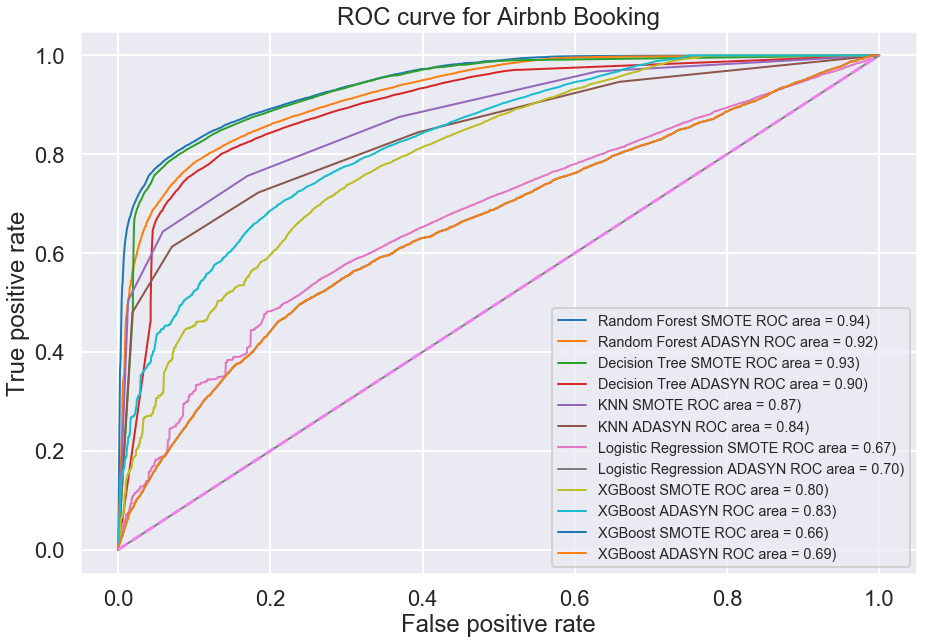

In [987]:
plt.figure(figsize=(15,10))
#random forest
plt.plot(fpr_rf1, tpr_rf1,lw=2, label='Random Forest SMOTE ROC area = %0.2f)' % roc_auc_RF1)
plt.plot(fpr_rf2, tpr_rf2,lw=2, label='Random Forest ADASYN ROC area = %0.2f)' % roc_auc_RF2)
#decision tree
plt.plot(fpr_dt1, tpr_dt1,lw=2, label='Decision Tree SMOTE ROC area = %0.2f)' % roc_auc_DT1)
plt.plot(fpr_dt2, tpr_dt2,lw=2, label='Decision Tree ADASYN ROC area = %0.2f)' % roc_auc_DT2)
#knn
plt.plot(fpr_knn1, tpr_knn1,lw=2, label='KNN SMOTE ROC area = %0.2f)' % roc_auc_KNN1)
plt.plot(fpr_knn2, tpr_knn2,lw=2, label='KNN ADASYN ROC area = %0.2f)' % roc_auc_KNN2)
#logistic regression
plt.plot(fpr_lr1, tpr_lr1,lw=2, label='Logistic Regression SMOTE ROC area = %0.2f)' % roc_auc_LR1)
plt.plot(fpr_lr2, fpr_lr2,lw=2, label='Logistic Regression ADASYN ROC area = %0.2f)' % roc_auc_LR2)
# #xgboost
plt.plot(fpr_xgb1, tpr_xgb1,lw=2, label='XGBoost SMOTE ROC area = %0.2f)' % roc_auc_XGB1)
plt.plot(fpr_xgb2, tpr_xgb2,lw=2, label='XGBoost ADASYN ROC area = %0.2f)' % roc_auc_XGB2)
#naive bayes
plt.plot(fpr_nb1, tpr_nb1,lw=2, label='XGBoost SMOTE ROC area = %0.2f)' % roc_auc_nb1)
plt.plot(fpr_nb2, tpr_nb2,lw=2, label='XGBoost ADASYN ROC area = %0.2f)' % roc_auc_nb2)

plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.legend(loc="lower right",ncol=1,fontsize = 'x-large')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Airbnb Booking');

In [989]:
# #Random Forest
print("Log-loss Random Forest SMOTE: {:6.4f}".format(log_loss(y_smoted_val, RF.predict_proba(X_smoted_val))))
print("Log-loss Random Forest ADASYN: {:6.4f}".format(log_loss(y_adasyn_val, RF.predict_proba(X_adasyn_val))))
#Decision Tree
print("Log-loss Decision Tree SMOTE: {:6.4f}".format(log_loss(y_smoted_val, DT.predict_proba(X_smoted_val))))
print("Log-loss Decision Tree ADASYN: {:6.4f}".format(log_loss(y_adasyn_val, DT.predict_proba(X_adasyn_val))))
#KNN
print("Log-loss KNN SMOTE: {:6.4f}".format(log_loss(y_smoted_val, knn.predict_proba(X_smoted_val))))
print("Log-loss KNN ADASYN: {:6.4f}".format(log_loss(y_adasyn_val, knn.predict_proba(X_adasyn_val))))
# Logistic Regression
print("Log-loss Logistic Regression SMOTE: {:6.4f}".format(log_loss(y_smoted_val, lr.predict_proba(X_smoted_val))))
print("Log-loss Logistic Regression ADASYN: {:6.4f}".format(log_loss(y_adasyn_val, lr.predict_proba(X_adasyn_val))))
#XGBoost
print("Log-loss XGBoost SMOTE: {:6.4f}".format(log_loss(y_smoted_val, xgb.predict_proba(X_smoted_val))))
print("Log-loss XGBoost ADASYN: {:6.4f}".format(log_loss(y_adasyn_val, xgb.predict_proba(X_adasyn_val))))
#naive bayes
print("Log-loss Naive Bayes SMOTE: {:6.4f}".format(log_loss(y_smoted_val, nb.predict_proba(X_smoted_val))))
print("Log-loss Naive Bayes ADASYN: {:6.4f}".format(log_loss(y_adasyn_val, nb.predict_proba(X_adasyn_val))))


Log-loss Random Forest SMOTE: 0.3218
Log-loss Random Forest ADASYN: 0.4383
Log-loss Decision Tree SMOTE: 0.7403
Log-loss Decision Tree ADASYN: 1.4936
Log-loss KNN SMOTE: 1.1214
Log-loss KNN ADASYN: 1.6032
Log-loss Logistic Regression SMOTE: 0.6455
Log-loss Logistic Regression ADASYN: 0.6220
Log-loss XGBoost SMOTE: 0.5529
Log-loss XGBoost ADASYN: 0.5221
Log-loss Naive Bayes SMOTE: 0.7263
Log-loss Naive Bayes ADASYN: 0.6792


From the result, we can tell that Random Forest with SMOTE is so far my best model. Let's try to combine the best 2 models to see if we can get a better model.

## Ensemble Methods 

In [990]:
#Ensemble methods help to minimize these factors. 
#These methods are designed to improve the stability and the accuracy of Machine Learning algorithms.
from mlxtend.classifier import StackingClassifier
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import (RandomForestClassifier,VotingClassifier, AdaBoostClassifier)

In [991]:
model_names=['RF','DT']

In [992]:
model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))
model_list

[('RF',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                         max_depth=None, max_features=33, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jobs=None, oob_score=False, random_state=None,
                         verbose=0, warm_start=False)),
 ('DT',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                         max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort=False,
                         random_state=0, splitter='best'))]

In [993]:
#Max Voting
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='hard', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(X_smoted_train, y_smoted_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=33,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=None,
              

In [994]:
y_pred_Ensemble = voting_classifer.predict(X_smoted_val)
precision_score(y_smoted_val,y_pred_Ensemble)

0.8822883593958636

In [995]:
#Avg Voting
voting_classifer_avg = VotingClassifier(estimators=model_list,
                                    voting='soft', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer_avg.fit(X_smoted_train, y_smoted_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=33,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=None,
              

In [996]:
y_pred_Ensemble_avg = voting_classifer_avg.predict(X_smoted_val)
precision_score(y_smoted_val,y_pred_Ensemble_avg)

0.871960682876358

In [997]:
#Weighted Voting
# create voting classifier
weights = [5.5,0.2]
voting_model_weight = VotingClassifier(estimators=model_list,
                                    voting='soft', 
                                    weights = weights,
                                    n_jobs=-1)
voting_model_weight.fit(X_smoted_train, y_smoted_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=33,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=None,
              

In [998]:
y_pred_Ensemble_weight = voting_model_weight.predict(X_smoted_val)
precision_score(y_smoted_val,y_pred_Ensemble_weight)

0.8753813257305774

In [999]:
#Weighted Voting
# create voting classifier
weights = [5.5,0.2]
voting_model_weight = VotingClassifier(estimators=model_list,
                                    voting='soft', 
                                    weights = weights,
                                    n_jobs=-1)
voting_model_weight.fit(X_adasyn_train, y_adasyn_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=33,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=None,
              

In [1000]:
y_pred_Ensemble_weight_ada = voting_model_weight.predict(X_adasyn_val)
precision_score(y_adasyn_val,y_pred_Ensemble_weight_ada)

0.8688236480451756

In [1002]:
#random forest
fpr_stack, tpr_stack, thresholds = roc_curve(y_smoted_val, voting_model_weight.predict_proba(X_smoted_val)[:,1])
roc_auc_stack=roc_auc_score(y_smoted_val, voting_model_weight.predict_proba(X_smoted_val)[:,1])

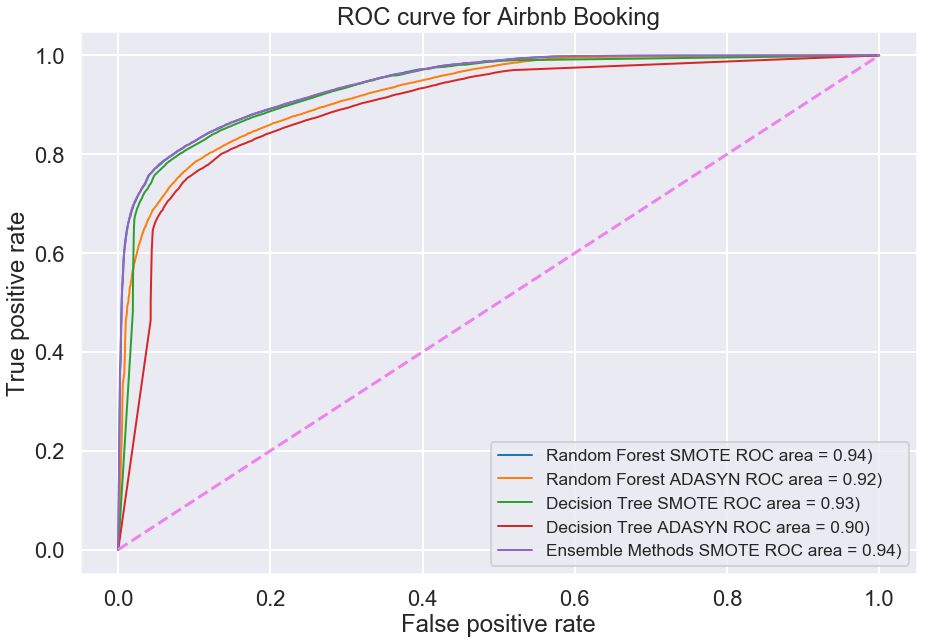

In [1007]:
plt.figure(figsize=(15,10))
#random forest
plt.plot(fpr_rf1, tpr_rf1,lw=2, label='Random Forest SMOTE ROC area = %0.2f)' % roc_auc_RF1)
plt.plot(fpr_rf2, tpr_rf2,lw=2, label='Random Forest ADASYN ROC area = %0.2f)' % roc_auc_RF2)
#decision tree
plt.plot(fpr_dt1, tpr_dt1,lw=2, label='Decision Tree SMOTE ROC area = %0.2f)' % roc_auc_DT1)
plt.plot(fpr_dt2, tpr_dt2,lw=2, label='Decision Tree ADASYN ROC area = %0.2f)' % roc_auc_DT2)
#ensemble method
plt.plot(fpr_stack, tpr_stack,lw=2, label='Ensemble Methods SMOTE ROC area = %0.2f)' % roc_auc_stack)

plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.legend(loc="lower right",ncol=1,fontsize = 'xx-large')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Airbnb Booking');

After using ensemble method, we can see that the Random Forest SMOTE model is still the best model so far. Now that we have an idea about which model perform the best in general, we can compare their precision scores.

In [1008]:
rf_precision=precision_score(y_smoted_val,y_predict_rf)
rf_ada_precision=precision_score(y_adasyn_val,y_predict_rf_ada)
dt_precision=precision_score(y_smoted_val,y_pred_dt)
dt_ada_precision=precision_score(y_adasyn_val,y_pred_dt_ada)
es_precision=precision_score(y_smoted_val,y_pred_Ensemble_weight)

Log Loss: show the uncertainty of your prediction based on how much it varies from the actual label. 

In [1009]:
#Random Forest
log1=log_loss(y_smoted_val, RF.predict_proba(X_smoted_val))
log2=log_loss(y_adasyn_val, RF.predict_proba(X_adasyn_val))
#Decision Tree
log3=log_loss(y_smoted_val, DT.predict_proba(X_smoted_val))
log4=log_loss(y_adasyn_val, DT.predict_proba(X_adasyn_val))
#Ensemble Method
log5=log_loss(y_smoted_val, voting_model_weight.predict_proba(X_smoted_val))          

In [1010]:
# initialise data of lists. 
data = {'Precision':[rf_precision,rf_ada_precision,dt_precision,dt_ada_precision,es_precision],
       'AUC':[roc_auc_RF1,roc_auc_RF2,roc_auc_DT1,roc_auc_DT2,roc_auc_stack],
       'Log-Loss':[log1,log2,log3,log4,log5]} 
  
# Creates pandas DataFrame. 
df = pd.DataFrame(data, index =['Random Forest SMOTE', 'Random Forest ADASYN', 'Decision Tree SMOTE', 
                                'Decision Tree ADASYN','Ensemble Method']) 
  
# print the data 
df 

,Precision,AUC,Log-Loss
Random Forest SMOTE,0.875171,0.944476,0.321781
Random Forest ADASYN,0.870102,0.923468,0.438302
Decision Tree SMOTE,0.873153,0.934041,0.740336
Decision Tree ADASYN,0.868951,0.897142,1.493626
Ensemble Method,0.875381,0.944573,0.322501


## Final Model Testing

In [1011]:
#Random Forest SMOTE
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, max_features=10)
RF.fit(X_smoted, y_smoted) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1012]:
y_predict_rf_final = RF.predict(X_smoted_test)

In [1013]:
print(metrics.classification_report(y_smoted_test, y_predict_rf_final))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.86     37731
         1.0       0.88      0.81      0.84     37723

    accuracy                           0.85     75454
   macro avg       0.85      0.85      0.85     75454
weighted avg       0.85      0.85      0.85     75454



In [1019]:
#Max Voting
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='soft', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(X_smoted, y_smoted)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=33,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     n_estimators=100,
                                                     n_jobs=None,
              

In [1020]:
y_pred_Ensemble_final = voting_classifer.predict(X_smoted_test)
# precision_score(y_smoted_test,y_pred_Ensemble)

In [1021]:
print(metrics.classification_report(y_smoted_test, y_pred_Ensemble_final))

              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85     37731
         1.0       0.88      0.80      0.84     37723

    accuracy                           0.84     75454
   macro avg       0.85      0.84      0.84     75454
weighted avg       0.85      0.84      0.84     75454



In [1022]:
precision_score(y_smoted_test,y_pred_Ensemble_final)

0.8757803468208093

In [1017]:
precision_score(y_smoted_test,y_predict_rf_final)

0.8783756636533219

We can see that the precision score of the Randaom Forest perform better on the test set than the validation set.